## Validação dos pseudo-neagtivos com Random Forest

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import shap
import numpy
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('dataset_final_para_modelo.csv', decimal=",")
df

,latitude,longitude,data,dia_semana,mes,is_weekend,hora,Sinistro,Chuva,tipo_via_num,tp_veiculo_bicicleta,tp_veiculo_caminhao,tp_veiculo_motocicleta,tp_veiculo_nao_disponivel,tp_veiculo_onibus,tp_veiculo_outros,tp_veiculo_automovel
0,-22.370454,-49.051246,2025-09-01,0,9,0,2,0,0,1.0,0,0,0,0,0,0,0
1,-22.371995,-49.025240,2025-08-22,4,8,0,11,0,0,0.0,0,0,0,0,0,0,0
2,-22.340207,-49.114017,2025-12-02,1,12,0,23,0,0,0.0,0,0,0,0,0,0,0
3,-22.332466,-49.056129,2024-04-23,1,4,0,17,0,1,0.0,0,0,0,0,0,0,0
4,-22.323449,-49.058255,2023-07-26,2,7,0,7,1,0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24562,-22.399218,-49.016150,2023-01-03,1,1,0,11,0,1,1.0,0,0,0,0,0,0,0
24563,-22.315863,-49.043546,2022-08-18,3,8,0,22,1,0,0.0,0,0,0,0,0,0,0
24564,-22.336420,-49.100087,2024-04-19,4,4,0,6,1,0,0.0,0,0,0,0,0,0,0
24565,-22.304959,-49.098589,2022-09-24,5,9,1,17,1,0,0.0,0,0,0,0,0,0,0


### Separação de Features (X) e Alvo (y)

In [10]:
X = df.drop(columns=['Sinistro', 'data']) 

y = df['Sinistro']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=8, stratify=y
)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treino: (17196, 15)
Tamanho do conjunto de teste: (7371, 15)


### Treinar o modelo

In [11]:
model = RandomForestClassifier(
    random_state=8,
    class_weight='balanced',
    )

model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Fazer previsões e avaliar as métricas


--- Matriz de Confusão ---


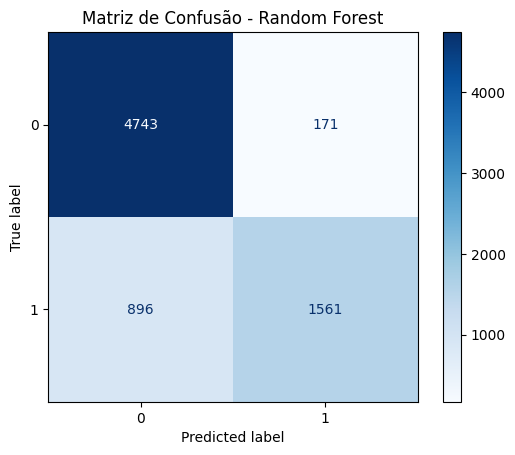


--- Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4914
           1       0.90      0.64      0.75      2457

    accuracy                           0.86      7371
   macro avg       0.87      0.80      0.82      7371
weighted avg       0.86      0.86      0.85      7371

--- AUC (Área Sob a Curva ROC) ---
0.8920


In [12]:
# O modelo faz as previsões nos dados de teste
y_pred = model.predict(X_test)

# --- Avaliação ---

print("\n--- Matriz de Confusão ---")
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Random Forest")
plt.show()

print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred))

y_prob = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f"--- AUC (Área Sob a Curva ROC) ---")
print(f"{auc:.4f}")

### SHAP (Shapley Additive exPlanations)

PermutationExplainer explainer: 7372it [51:25,  2.39it/s]                          
C:\Users\pirsp\AppData\Local\Temp\ipykernel_15920\1063239192.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:, :, 1], X_test, max_display=15, show=True)


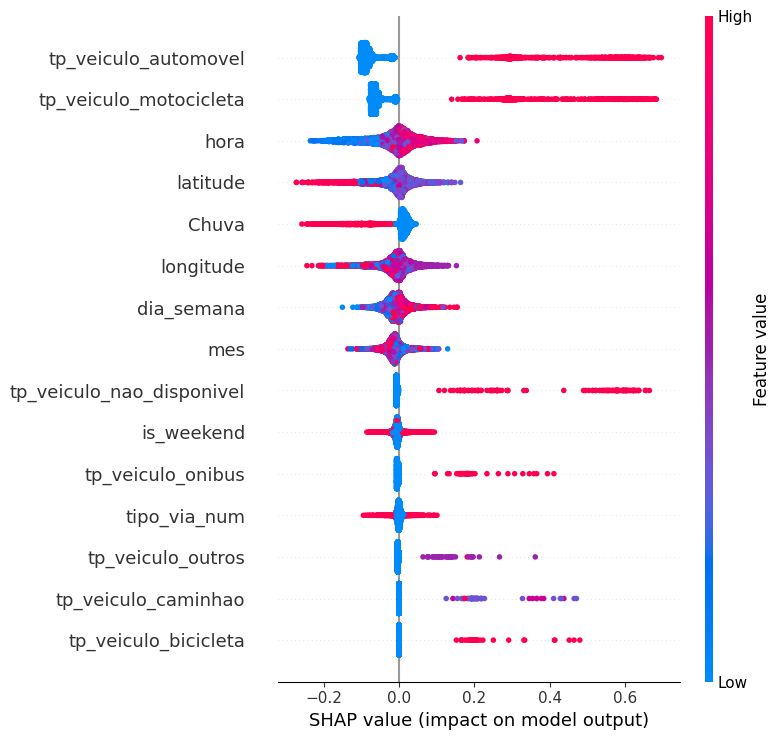

C:\Users\pirsp\AppData\Local\Temp\ipykernel_15920\1063239192.py:9: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar", max_display=15, show=True)


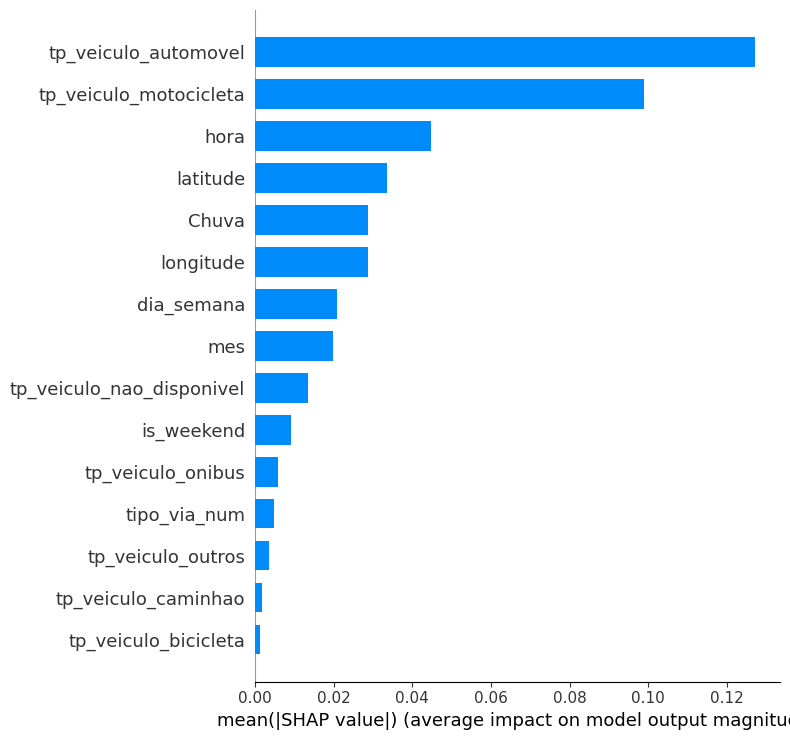

In [13]:
explainer = shap.Explainer(model.predict_proba, X_train)
shap_values = explainer(X_test)

# Gráfico de Resumo Detalhado (Beeswarm) para a classe 1
# Usamos max_display para mostrar as 15 features mais importantes
shap.summary_plot(shap_values[:, :, 1], X_test, max_display=15, show=True)

# Gráfico de Barras (Importância Global) para a classe 1
shap.summary_plot(shap_values[:, :, 1], X_test, plot_type="bar", max_display=15, show=True)